# Shopify Tehnical Challenge Submission
Data Science Winter 2022 Internship  
Vanessa Bayubaskoro

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

## Question 1a

Given some sample data, write a program to answer the following.

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  
  
Solution:   

There may exist some super expensive sneakers which will affect the value of the AOV. Let's check by looking at the price range of sneakers. By using min and max function, we find that the cheapest shoes are 90 dollars and the most expensive shoes are 25 275 dollars. We see that we have a really big range of sneaker prices. There exist some really expensive shoes. Their values have affected the calcualted AOV because the mean is easily influeced by extreme values. In the histogram below, we see that there are some extreme values that fall on the right tail. The values are skewed to the right. 

A better way to evaluate this data is to calculate the median. The median will not be as affected by the extreme values. 








In [57]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

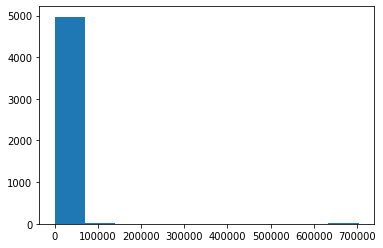

In [58]:
#histogram of the order amount
plt.hist(order_amount)

In [55]:
# cheapest sneaker price 
min(data["order_amount"]/data["total_items"])

90.0

In [56]:
# most expensive sneaker price
max(data["order_amount"]/data["total_items"])

25725.0

## Question 1b
What metric would you report for this dataset?

Solution: I would repoort the median of the order amount because the median value is more resistant to the extreme values in skewed data. In a right tailed histogram, the mean will be higher than the median. Hence why the calcaulted AOV was really high. 

## Question 1c
What is its value?

Solution: The value of the median of the order amount is 284 dollars which represents better how much a customer will spend on sneakers in one order. 

In [66]:
stats.median(data["order_amount"])

284.0

## Question 2a
Final numerical answer: 54 orders were shipped by Speedy Express in total.      
  
SQL Code:     
select count(*) from orders where shipperID in (select shipperID from Shippers where ShipperName = 'Speedy Express');



## Question 2b
Final answer: Peacock is the last name of the employee with the most orders.
  
SQL Code:  
SELECT e.LastName, o.EmployeeID, COUNT(*) as MaxOrderEmployee FROM Orders o, Employees e WHERE o.employeeID = e.employeeID GROUP BY o.EmployeeID ORDER BY MaxOrderEmployee desc LIMIT 1;



## Question 2c

Final answer: The Steeleye Stout was the most ordered by customers in Germany.  

SQL Code:
SELECT products.productID, MAX(orderdetails.quantity), products.ProductName from (((customers
join orders on orders.customerID = customers.customerID)
join orderdetails on orderdetails.orderID = orders.orderID)
join products on orderdetails.productID = products.productID)
where Country = 'Germany';   
